# Handling outliers with Pandas

Outliers are extreme values that lie far away from the majority of the data points in a dataset. These values do not follow the general pattern of the data and can occur due to various reasons like data entry mistakes, measurement errors or natural variations. For example if most people in a group weigh between 50-70 kg and one person weighs 150 kg that person's weight is considered an outlier because it is higher than the others.

Outliers can be classified into two types:

* Univariate Outliers: Outliers detected in one feature or variable.
* Multivariate Outliers: Outliers detected based on relationships between two or more features.

We should Handle Outliers because they can lead to:

* Skewing of results in statistical analysis.
* Mislead machine learning models.
* Reduce model accuracy.
* Cause high error rates.

Ignoring outliers can lead to incorrect conclusions and poor model performance in regression and clustering tasks. There are several methods to identify outliers in Python:

## Visualization Techniques

## 1. Box Plot
A box plot shows the minimum, first quartile (Q1), median, third quartile (Q3) and maximum values of the dataset. Outliers are typically plotted as individual points.

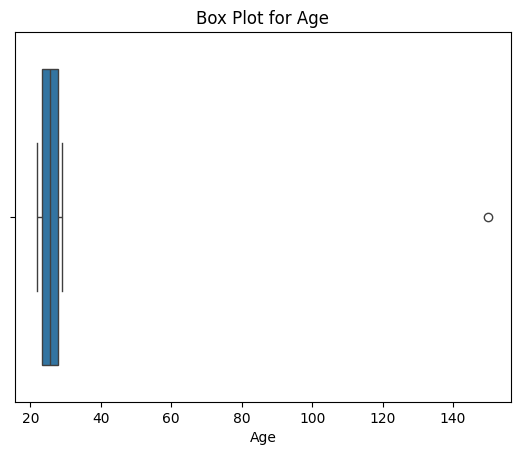

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = {'Age': [22, 25, 28, 24, 23, 29, 150, 27, 26, 22]}
df = pd.DataFrame(data)

sns.boxplot(x=df['Age'])
plt.title("Box Plot for Age")
plt.show()

The plot will represents the interquartile range with a line for the median. The data point at 150 will be marked separately as an outlier.

## 2. Scatter Plot

A scatter plot displays data points on a two-dimensional graph. Outliers can be identified as points that are distant from the main cluster of data.

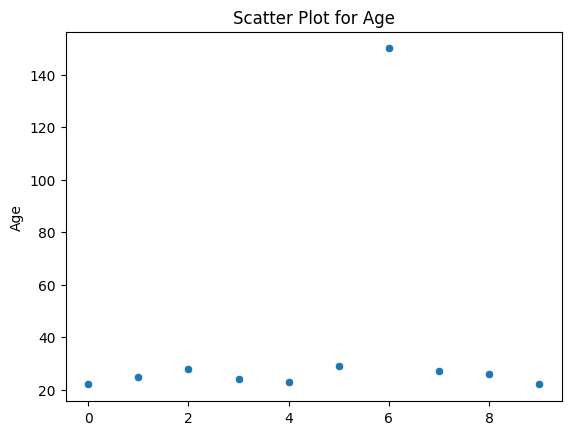

In [2]:
sns.scatterplot(x=range(len(df)), y='Age', data=df)
plt.title("Scatter Plot for Age")
plt.show()

## 3. Histogram

A histogram shows the distribution of a dataset by dividing it into bins. Outliers can be identified as bars that are far away from the main distribution.

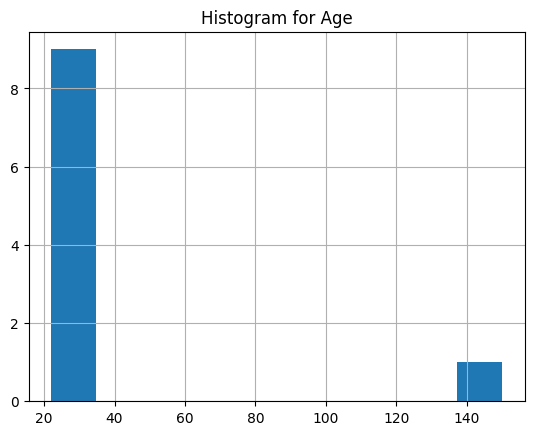

In [3]:
df["Age"].hist(bins=10)
plt.title("Histogram for Age")
plt.show()

# Statistical Methods

## 1. Z-Score Method

The Z-score measures how many standard deviations a data point is from the mean. A common threshold to identify outliers is a Z-score greater than 3 or less than -3.

In [4]:
from scipy import stats
import numpy as np
import pandas as pd

data = {'Age': [22, 25, 28, 24, 23, 29, 150, 27, 26, 22]}
df = pd.DataFrame(data)

z = np.abs(stats.zscore(df['Age']))
print("Z-Score Values:\n", z)

outliers = df[z > 3]
print("Outliers:\n", outliers)

Z-Score Values:
 [0.41558794 0.33566718 0.25574643 0.36230744 0.38894769 0.22910617
 2.9943644  0.28238668 0.30902693 0.41558794]
Outliers:
 Empty DataFrame
Columns: [Age]
Index: []


## 2. Interquartile Range (IQR) Method

The IQR is the range between the first quartile (Q1) and the third quartile (Q3). Outliers are typically defined as data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.